In [2]:
#회귀이론 : 임의의 어떤 숫자를 예측하는 문제
#bit.ly/perch_data

import numpy as np

#바로 numpy로 전환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

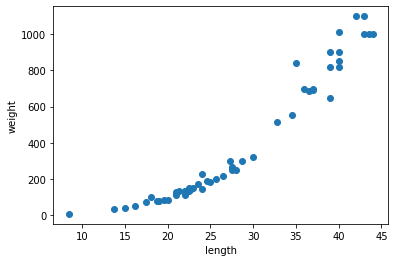

In [4]:
#산점도를 측정하여 이를 비교
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
#훈련셋과 테스트셋으로 나눔
# 회귀에서는 분류를 target으로 정하지 않고 그 결과값을 target으로 정하기 때문에 분류의 값을 따로 정하는 것이 아니라 
# x에 대응되는 y의 값을 target으로 설정하는 것. 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


In [29]:
print(train_input.shape, test_input.shape)
train_input

(42,) (14,)


array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [30]:
# 사이킷런의 사용할 훈련 세트는 2차원 배열이기 때문에 reshape를 통해서 배열의 형태만 변경해줌
# 이를 위한 것이 reshape

test_array = np.array([1,2,3,4])
test_array.shape

(4,)

In [31]:
test_array = test_array.reshape(2,2)
test_array.shape

(2, 2)

In [32]:
test_array

array([[1, 2],
       [3, 4]])

In [35]:
#train_input과 test_input을 2차원 배열로 변경하기 위한 방법
# train_input.reshape(42,1) 하지만 크기에 -1을 지정하면 나머지 원소개수로 모두 채우라는 의미

train_input = train_input.reshape(-1,1)
#train_input = train_input.reshape(42,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [36]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [37]:
# 회귀모델을 위한 것은 classifier가 아닌 regressor가 됨

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#회귀모델 훈련
knr.fit(train_input, train_target)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [38]:
knr.score(test_input, test_target)

0.9928094061010639

In [39]:
# krn 훈련된 것이 얼마나 정확한지를 알기 쉽게 정리한것
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
mae
#아래와 같이 19g정도의 차이를 보임

19.157142857142862

In [41]:
#훈련한것을 score 내서 알아보기
knr.score(train_input, train_target)


0.9698823289099255

In [42]:
# kn에 대한 이웃의 개수를 줄이게 되면 국지적인 패턴에 민감하게 되기 때문에 이를 토대로 알고리즘을 수정하게 되면
# 위에서와 같이 underfiting(훈련셋의 결과가 테스트결과보다 낮게 나타나는 경우)를 해결할 수 있음

#이웃의 개수를 3으로 설정
knr.n_neighbors = 3

#모델 재 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)


0.9804899950518966

In [43]:
#테스트 인풋도 결과를 도출해 내보자
knr.score(test_input, test_target)

# 훈련 : 0.98 , 테스트 : 0.97로 과대적합고 과소적합도 발생하지 않는 상태임. 

0.974645996398761

In [44]:
# k-최근접 이웃의 한계
# bit.ly/perch_data

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [46]:
# 데이터를 훈련세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [47]:
#2차원 배열로 변경 train_input, test_input
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


In [50]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [51]:
knr.predict([[50]])
# 50cm의 농어가 생각해 보면 이것보다 더 많은 무게를 가질 수 밖에 없음. 따라서 어디서 문제가 생긴 것일까?

array([1033.33333333])

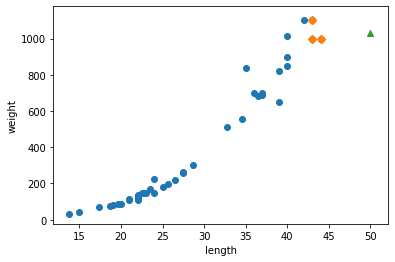

In [55]:
#산점도를 통해서 이를 확인해 볼 필요가 있음

import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#운련 세트의 산점도를그림
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(50, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [56]:
#위 그림에서와 같이 길이가 커질수록 무게가 늘어나야 하는데 실제로는 그렇지 않음. 이는 평균값과 같을 것이다. 
# 즉 target들의 평균값을 그대로 가져왔을 것이다 라고 판단하게 됨. 
np.mean(train_target[indexes])


1033.3333333333333

In [57]:
# 따라서 predict할때 그 값이 증가하게 되더라도 훈련에서의 이웃들은 모두 같은 것이기 때문에 같은 값을 나타낼 수 밖에 없음
knr.predict([[100]])

array([1033.33333333])

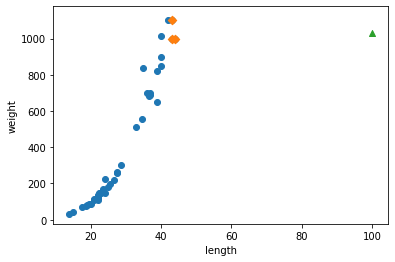

In [58]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(100, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
#그래프로 다시 표현하면 밑에 그림과 같을것이다. 

In [61]:
# 선현회귀
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()

#선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측
lr.predict([[50]])

array([1241.83860323])

In [62]:
#선형 회귀에서 이러한 기울기에 대한 기울기와 절편을 알아보자
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


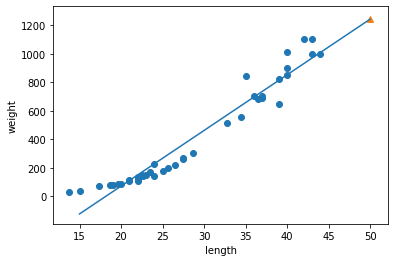

In [64]:
#이를 기바으로 15~50까지의 길이를 갖는 x축을 기반으로 기울기를 그려넣기

plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그립니다. 
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [65]:
#훈련에 대한 score를 통해서 R^2에 대한 점수를 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.9398463339976039
0.8247503123313558


In [68]:
#score가 낮게 나온 이유는 test에서, 실제 선형이 아니라 0이하로 그 무게가 나타나지 않음 때라서 이를 곡선의 형태로 나타내어야 함
#그럴려면 데이터가 곡선의 형태로 나타나야 함. 이를 위해서는 2차 방정식의 형태를 나타내야 함. 
# 농어의 길이를 제곱해서 원래 데이터 앞에서 나타내게 된다면
# ccolumn_stack()함수를 사용해서 이를 나타낼 것임
#train_poly는 제곡값, 원값 의 형태로 나타냄
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))


In [69]:
# 2차 방정식의 a,b,c를 잘 찾아야 함. 즉, a*x^2 + b*x + c 임.
# 타깃값은 그대로 사용, 이를 위해서는 그대로 poly를 훈련시킴

lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

In [70]:
print(lr.coef_, lr.intercept_)
#즉 1.01 = a, -21.6은 b, 116.05는 c가 됨

[  1.01433211 -21.55792498] 116.05021078278259


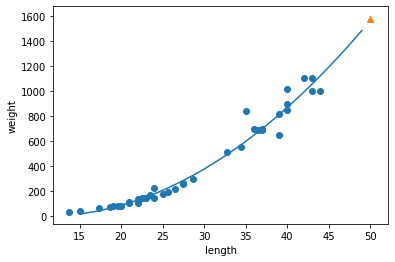

In [73]:
#구해진값을 이용하여 확인해 보기
#구간별 직선을 그리기 이ㅜ해 15-49까지 정수 배열을 만듦
point = np.arange(15, 50)

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식을 그림)
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)

#50cm 농어 데이터 그림
plt.scatter(50, 1574, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [74]:
# R의 값을 조사
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.9706807451768623
0.9775935108325122
